In [24]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
df = pd.read_csv('./data/train.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df['day'] = pd.to_datetime(df['datetime']).dt.dayofyear
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df.drop('datetime', axis=1, inplace=True)

<AxesSubplot:>

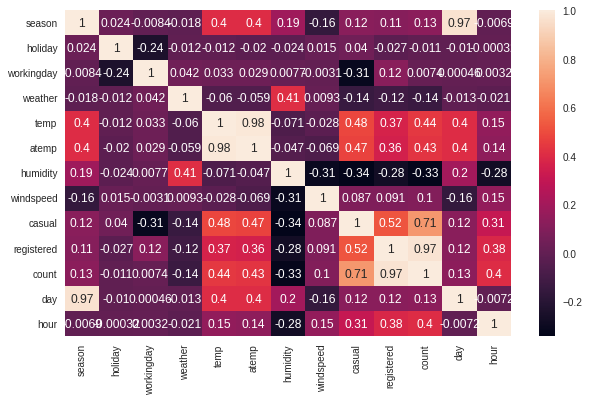

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [27]:
df2 = df.drop(columns=['registered', 'casual'], index=1)

In [28]:
df_test = pd.read_csv('./data/test.csv')
df_test.drop('Unnamed: 0', axis=1, inplace = True)
df_test['day'] = pd.to_datetime(df_test['datetime']).dt.dayofyear
df_test['hour'] = pd.to_datetime(df_test['datetime']).dt.hour
df_test.drop('datetime', axis=1, inplace=True)
df_test = df_test.drop(columns=['casual','registered'], axis=1)
df_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour
0,3,0,0,1,30.34,34.090,62,7.0015,168,245,0
1,3,0,0,1,29.52,34.850,74,8.9981,79,245,1
2,3,0,0,1,28.70,32.575,70,11.0014,69,245,2
3,3,0,0,1,28.70,32.575,70,7.0015,35,245,3
4,3,0,0,1,28.70,32.575,70,0.0000,12,245,4
...,...,...,...,...,...,...,...,...,...,...,...
1818,4,0,1,1,15.58,19.695,50,26.0027,336,354,19
1819,4,0,1,1,14.76,17.425,57,15.0013,241,354,20
1820,4,0,1,1,13.94,15.910,61,15.0013,168,354,21
1821,4,0,1,1,13.94,17.425,61,6.0032,129,354,22


In [29]:
lr = LinearRegression()
lr.fit(df2.drop('count', axis=1), df2['count'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lr.score(df_test.drop('count', axis=1), df_test2['count'])

0.12260151959451593